# Multi Variable Linear Regression


### Theory of Multivariable Linear Regression

Multivariable linear regression is an extension of simple linear regression that models the relationship between a dependent variable and multiple independent variables. It aims to find the best-fitting linear equation that describes how the dependent variable changes as the independent variables change.

#### Mathematical Model

The general form of a multivariable linear regression model is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
$$

where:

- $y$ is the dependent variable (response).
- $x_1, x_2, \ldots, x_p$ are the independent variables (predictors).
- $\beta_0$ is the intercept.
- $\beta_1, \beta_2, \ldots, \beta_p$ are the coefficients of the independent variables.
- $\epsilon$ is the error term (residual).

#### Objective

The objective of multivariable linear regression is to estimate the coefficients ($\beta_0, \beta_1, \ldots, \beta_p$) such that the sum of the squared differences between the observed values and the predicted values is minimized. This is known as the method of least squares.

#### Use Cases

Multivariable linear regression is widely used in various fields to understand and predict the relationship between multiple factors and an outcome. Some common use cases include:

1. **Economics**: Predicting economic indicators such as GDP, inflation, or unemployment rates based on multiple factors like interest rates, consumer spending, and government policies.
2. **Healthcare**: Estimating patient outcomes based on various predictors such as age, weight, blood pressure, and cholesterol levels.
3. **Marketing**: Analyzing the impact of advertising spend, pricing, and promotions on sales revenue.
4. **Real Estate**: Predicting property prices based on features like location, size, number of bedrooms, and age of the property.
5. **Environmental Science**: Modeling the impact of multiple environmental factors on climate change or pollution levels.

#### Assumptions

Multivariable linear regression relies on several key assumptions:

1. **Linearity**: The relationship between the dependent and independent variables is linear.
2. **Independence**: The observations are independent of each other.
3. **Homoscedasticity**: The variance of the residuals is constant across all levels of the independent variables.
4. **Normality**: The residuals are normally distributed.

Violations of these assumptions can lead to biased or inefficient estimates, so it is important to check and address them during the modeling process.

#### Conclusion

Multivariable linear regression is a powerful statistical tool for modeling and predicting the relationship between a dependent variable and multiple independent variables. By understanding the underlying theory and assumptions, practitioners can effectively apply this technique to a wide range of real-world problems.


In [15]:
class Point:
    def __init__(self, x1, x2, y):
        self.x1 = x1
        self.x2 = x2
        self.y = y

    def __str__(self):
        return f"({self.x1}, {self.x2}, {self.y})"

In [16]:
import numpy as np


class MultiVariantLinearRegression:
    def __init__(self) -> None:
        self.b0 = 0.0
        self.b1 = 0.0
        self.b2 = 0.0

    def build_model(self, points: list) -> None:
        # Number of iterations
        epochs = 10000
        n = float(len(points))  # Number of points
        best_loss = float('inf')

        for i in range(epochs):
            choice = np.random.choice([0, 1, 2])
            # Randomaly adjust b0, b1 and b2
            b_adjust = np.random.normal()

            if choice == 0:
                self.b0 += b_adjust
            elif choice == 1:
                self.b1 += b_adjust
            else:
                self.b2 += b_adjust

            # Calculate loss, which is the mean squared error
            new_loss = 0.0
            for p in points:
                new_loss += (p.y - (self.b1 * p.x1 + self.b2 * p.x2 + self.b0)) ** 2

            # if loss is better, keep the new values
            if new_loss < best_loss:
                best_loss = new_loss
            else:
                if choice == 0:
                    self.b0 -= b_adjust
                elif choice == 1:
                    self.b1 -= b_adjust
                else:
                    self.b2 -= b_adjust

In [17]:
import matplotlib.pyplot as plt


def plot_data(points: list, b0, b1, b2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x1 = [p.x1 for p in points]
    x2 = [p.x2 for p in points]
    y = [p.y for p in points]

    ax.scatter(x1, x2, y)

    # Create the meshgrid
    x1 = np.linspace(min(x1), max(x1), 100)
    x2 = np.linspace(min(x2), max(x2), 100)
    x1, x2 = np.meshgrid(x1, x2)

    # Calculate the predicted y
    y = b0 + b1 * x1 + b2 * x2

    ax.plot_surface(x1, x2, y, alpha=0.5)

    plt.show()

In [18]:
import pandas as pd


def generate_samples() -> pd.DataFrame:
    '''Generate House Price Data'''
    np.random.seed(0)
    n_samples = 100

    # House size between 500 and 3500 (in square feet)
    size = np.random.randint(500, 3500, n_samples)
    # Number of bedrooms between 1 and 5
    bedrooms = np.random.randint(1, 6, n_samples)
    price = 50 * size + 10000 * bedrooms + np.random.normal(0, 20000, n_samples)

    # Create a DataFrame with the data
    df = pd.DataFrame({'Size': size, 'Bedrooms': bedrooms, 'Price': price})
    return df

y = 59.17032976537759x1 + 1392.2329220030228x2 + 1261.973325776806


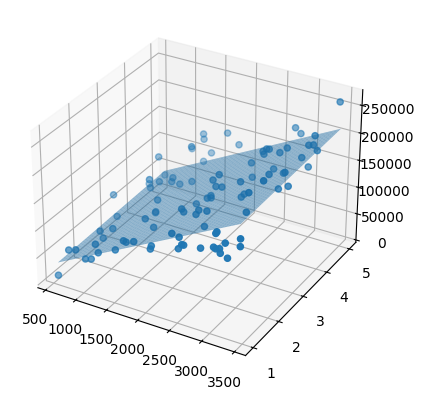

In [19]:
if __name__ == '__main__':
    df = generate_samples()
    points = [
        Point(row['Size'], row['Bedrooms'], row['Price'])
        for index, row in df.iterrows()
    ]
    model = MultiVariantLinearRegression()
    model.build_model(points)
    print(f"y = {model.b1}x1 + {model.b2}x2 + {model.b0}")
    plot_data(points, model.b0, model.b1, model.b2)